# 106 Pre-Class Assignment: Diagonalization & Linear Dynamical Systems 

### Readings for Diagonalization
 * [Heffron Chapter 5 II1-2 pg 388-396](http://joshua.smcvt.edu/linearalgebra/book.pdf)
 * [**_Beezer Section SD pg 403-415_**](http://linear.ups.edu/download/fcla-3.50-tablet.pdf)


### Readings for Linear Dynamical Systems
 * [**_Boyd Chapter 9 pg 163-173_**](http://vmls-book.stanford.edu/vmls.pdf)



### Goals for today's pre-class assignment 

1. [Eigenvalues and eigenvectors review](#Eigenvalues_and_eigenvectors_review)
1. [Diagonalizable Matrix](#Diagonalizable_Matrix)
1. [Linear Dynamical Systems](#Linear-Dynamical-Systems)
2. [Markov Models](#Markov-Models)
3. [Ordinary Differential Equations](#Ordinary-Differential-Equations)
4. [Assignment wrap up](#Assignment-wrap-up)


----
<a name="Eigenvalues_and_eigenvectors_review"></a>
## 1. Eigenvalues and eigenvectors review

**Definition**: A non-zero vector $x$ in $R^n$ is called an *eigenvector* of a $n\times n$ matrix $A$ if $Ax$ is a scalar multiple of $x$. If $Ax = \lambda x$, then $\lambda$ is called the *eigenvalue* of $A$ corresponding to $x$.

### Steps for finding the eigenvalues and eigenvectors

We want to find $\lambda$ and non-zero vector $x$ such that $Ax=\lambda x$ for a $n\times n$ matrix. 
1. We introduce an identity matrix $I$ of $n\times n$. Then the equation becomes
$$Ax = \lambda I x$$
$$Ax-\lambda I x = 0$$
$$(A-\lambda I)x = 0$$
2. This suggests that we want to find $\lambda$ such that $(A-\lambda I)x=0$ has a non-trivial solution. 
It is equivalent to that the matrix $A-\lambda I$ is singular, i.e., has a determinant of $0$.
$$|A-\lambda I|=0$$
3. The determinant is polynomial in $\lambda$ (called the characteristic polynomial of $A$) with degree $n$. We solve this equation (called the characteristic equation) for all possible $\lambda$ (eigenvalues).
4. After finding the eigenvalues, we substitute them back into 
$$(A-\lambda I)x=0$$
and find the eigenvectors $x$. 

Let's calculate eigenvalues for the following matrix: 

$$ A=\begin{bmatrix} 0 & 0 & -2 \\ 1 & 2 & 1 \\ 1 & 0 & 3 \end{bmatrix}$$

#### Find eigenvalues
Looking at the above recipe, let's solve the problem symbollically using `sympy`. First lets create a matrix $B$ such that:

$$B = A-\lambda I$$

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

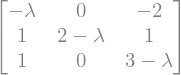

In [2]:
#Most sympy requires defeing the variables as "symbols"
#Once we do this we can use the variables in place of numbers
lam = sym.symbols('lambda')

A = sym.Matrix([[0, 0 ,-2], [1, 2, 1], [1, 0, 3]])
I = sym.eye(3)

B = A - lam*I

B

Now, per step 2, the determinant of $B$ must be zero. Note that `sympy` calculates the determinate symbollically as follows:

In [3]:
B.det()

&#9989; **<font color=red>Do This:</font>**  Using the ```sympy.solve``` function on the determinate of $B$ to solve for ```lam``` ($\lambda$). Verify that the solution to the last question produces the same eigenvalues as above. 

In [4]:
# Put your code to solve for det(B) = 0 here

&#9989; **<font color=red>Do This:</font>**  First, let's use the built in funciton ```eigenvals``` function in ```sympy``` to calculate the eigenvalues. Find out the meaning of the output.

In [5]:
# Put your code here

Explain your output here.

#### Find eigenvectors
Now we know the eigenvalues, we can substitue them back into the equation to find the eigenvectors.  
We solve this symbollically using `sympy`. First let's make a vector of our eigenvalues (from above):

In [6]:
eig = [1,2]

Now (per step 4 above) we need to solve the equation $(A-\lambda I)x=0$. One way to do this in `sympy` is as follows:

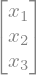

In [7]:
x1,x2,x3 = sym.symbols(['x_1','x_2','x_3'])

x = sym.Matrix([[x1],[x2],[x3]])
x

In [8]:
for lam in eig:
    vec = sym.solve((A - lam*I)*x,x)
    print(vec)

{x_2: x_3, x_1: -2*x_3}
{x_1: -x_3}


&#9989; **<font color=red>QUESTION:</font>**  Explain your output here. (Hint, you can also try the `rref` to find the solutions)

Put your answer here

&#9989; **<font color=red>Do This:</font>**  Next, let's use the ```eigenvects```  function in ```sympy``` to find three linear independent eigenvectors for the matrix $A$?

In [9]:
# Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Compare this answer to the eigenvectors we calculated above. Does this answer make sense?  What does the syntax tell us? 

Put your answer here

&#9989; **<font color=red>DO THIS:</font>** Find the eigenvalues and eigenvectors of the following matrix:
$$ A2=\begin{bmatrix} 2 & 1 \\ 0 & 2 \end{bmatrix}$$

In [10]:
#do work here

&#9989; **<font color=red>QUESTION:</font>**  What are the eigenvalues for the matrix $A2$?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What are the eigenvectors for the matrix $A2$?

Put your answer to the above question here

----
<a name="Diagonalizable_Matrix"></a>
## 2. Diagonalizable Matrix

In class we will be using matrix diagonalization to solve some problems.  

Matrix $A$ is diagonalizable if there exists a diagonal matrix $D$ that is similar similar to $A$:

$$ D = C^{-1}AC$$

If matrix $A$ has linearly independent eigenvectors ($v_1, \ldots v_n$) then $A$ is diagonalizable with the following solution:

$$C = \left[ v_1^T, \ldots, v_n^T \right]$$

In other words, each column of $C$ is a linearly independent eigenvector of $A$. The diagonal matrix $D$ is

$$ D = 
\left[
\begin{matrix}
    \lambda_1  & 0  & 0 \\
    0   & \ddots & 0  \\
    0   & 0 & \lambda_n 
\end{matrix}
\right] 
$$

In other-other words, $D$ consists of the corresponding eigenvalues.

In [11]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

&#9989; **<font color=red>DO THIS:</font>** Using ```numpy```, Diagonalize (i.e. calculate  C and D) the following matrix:

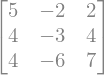

In [12]:
A = np.matrix([[5, -2, 2], [4, -3, 4], [4,-6,7]])
sym.Matrix(A)

In [13]:
# Put your answer here

In [14]:
from answercheck import checkanswer
checkanswer.matrix(D,'56821475223b52e0b6e751da444a1441');

ModuleNotFoundError: No module named 'answercheck'

&#9989; **<font color=red>DO THIS:</font>** Verify that $A$ is in fact Diagonalizable by calculating $D2 = C^{-1}AC$ and comparing it to your original $D$ using ```np.allclose```.

In [ ]:
#Put your verificaiton code here.

In [ ]:
np.allclose(D,D2)

### Diagonalization of Symmetric Matrices

One special case is Symmetric Matrices.  It can be shown that symmetric Matrices are Diagonalizable and the resulting eigenvectors are not only linearly independent but also orthogonal.    Since this is true, the equation changes to: 


$$ D = C^{T}AC$$

&#9989; **<font color=red>QUESTION:</font>** Why do we care if $C$ is orthogonal?  What advantages does the above equation give us?

Put your answer to the above question here.



---
<a name=Linear-Dynamical-Systems></a>
## 3. Linear Dynamical Systems




A linear dynamical system is a simple model of how a system changes with time.  These systems can be represented by the following "dynamics" or "update equation":

$$x_{(t+1)} = A_tx_t$$

Where $t$ is an integer representing th progress of time and $A_t$ are an $n \times n$ matrix called the dynamics matrices. Often the above matrix does not change with $t$. In this case the system is called "time-invariant". 

We have seen a few "time-invarient" examples in class. 


&#9989; **<font color=red>DO THIS:</font>**  Review **_Chapter 9 in the Boyd and Vandenberghe_** text and become familiar with the contents and the basic terminology. 


---
<a name=Markov-Models></a>
## 4. Markov Models

We breifly discussed Markov models in the previous class. These are just one example of Linear Dynamical Systems.


### Example

The dynamics of infection and the spread of an epidemic can be modeled as a linear dynamical system. 

We count the fraction of the population in the following four groups:
+ Susceptible: the individuals can be infected next day
+ Infected: the infected individuals 
+ Recovered (and immune): recovered individuals from the disease and will not be infected again
+ Decreased: the individuals died from the disease

We denote the fractions of these four groups in $x(t)$. For example $x(t)=(0.8,0.1,0.05,0.05)$ means that at day $t$, 80\% of the population are susceptible, 10% are infected, 5% are recovered and immuned, and 5% died.

We choose a simple model here. After each day,

+ 5% of the susceptible individuals will get infected 
+ 3% of infected inviduals will die
+ 10% of infected inviduals will recover and immuned to the disease
+ 4% of infected inviduals will recover but not immuned to the disease
+ 83% of the infected inviduals will remain


&#9989;  **<font color=red>Do this:</font>** Write the dynamics matrix for the above markov linear dynamical system. Come to class ready to discuss the matrix. (hint the columns of the matrix should add to 1). 

In [ ]:
# Put your matrix here

&#9989;  **<font color=red>Do this:</font>** Review how we solved for the long term steady state of the markov system.  See if you can find these probabilities for your dyamics matrix.


In [ ]:
# Put your matrix here



---
<a name=Ordinary-Differential-Equations></a>
## 5. Ordinary Differential Equations




Ordinary Differential Equations (ODEs) are yet another for of linear dynamical systems and are a scientific model used in a wide range of problems of the basic form:

### $$\dot{x} = A x$$

These are equations such that the is the instantaneous rate of change in $x$ (i.e. $\dot{x}$ is the derivative of $x$) is dependent on $x$.  Many systems can be modeled with these types of equations. 

Here is a quick video that introduces the concepts of Differential Equations. The following is a good review of general ODEs.  

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("8QeCQn7uxnE",width=640,height=360, cc_load_policy=True)

Now consider an ODE as a system of linear equations:

$$\dot{x_t} = A x_t$$

Based on the current $x$ vector at time $t$ and the matrix $A$, we can calculate the derivative at $\dot{x}$ at time $t$.  Once we know the derivative, we can increment the time to by some small amount $dt$ and calculate a new value of $x$ as follows:

$$x_{t+1} = x_t + \dot{x_t}dt$$

Then we can do the exact sequence of calculations again for $t+2$. The following function has the transition matrix ($A$), the starting state vector ($x_0$) and a number of time steps ($N$) and uses the above equations to calculate each state and return all of the $x$ statues:


The following code generates a trajectory of points starting from `x_0`, applying the matrix $A$ to get $x_1$ and then applying $A$ again to see how the system progresses from the start state. 


In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

In [ ]:
def traj(A, x, n):
    dt = 0.01
    x_all = np.matrix(np.zeros((len(x),n)))   # Store all points on the trajectory
    for i in range(n):  
        x_dot = A*x         # First we transform x into the derrivative
        x = x + x_dot*dt    # Then we estimate x based on the previous value and a small increment of time.
        x_all[:,i] = x[:,0] 
    return x_all

For example the following code uses the matrix $A= \begin{bmatrix}1 & 1 \\ 1 & -2\end{bmatrix}$ and the starting point (0,0) over 50 timesteps to get a graph:

In [ ]:
A = np.matrix([[1,1],[1,-2]])
x0 = np.matrix([[1],[1]])

x_all = traj(A, x0, 50)
plt.scatter(np.asarray(x_all[0,:]),np.asarray(x_all[1,:]))

plt.scatter(list(x0[0,:]),list(x0[1,:])) #Plot the start point as a refernce

&#9989;  **<font color=red>Do this:</font>** Let 
$$A= \begin{bmatrix}2 & 3 \\ 4 & -2\end{bmatrix}$$

Write a loop over the points $(1.5,1)$, $(-1.5,-1)$, $(-1,2)$ and plot the results of the ```traj``` function: 

In [ ]:
A = np.matrix([[2,3],[4,-2]])
x0 = np.matrix([[1.5, -1.5, -1, 1, 2],[1, -1, 2, -2, -2]])

In [ ]:
# Put your code here

&#9989;  **<font color=red>Do this:</font>** Let 
$$A= \begin{bmatrix}6 & -1 \\ 1 & 4\end{bmatrix}$$

Write a loop over the points $(1.5,1)$, $(-1.5,-1)$, $(-1,2)$, $(1,-2)$ and $(2,-2)$ and plot the results of the ```traj``` function: 

In [ ]:
# Put your code here

&#9989;  **<font color=red>Do this:</font>** Let 
$$A= \begin{bmatrix}5 & 2 \\ -4 & 1\end{bmatrix}$$

Write a loop over the points $(1.5,1)$, $(-1.5,-1)$, $(-1,2)$, $(1,-2)$ and $(2,-2)$ and plot the results of the ```traj``` function: 

In [ ]:
# Put your code here

---
<a name=Assignment-wrap-up></a>
## 6. Assignment wrap up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!** If you cannont load the form below please try logging in to [spartan365.msu.edu](http://spartan365.msu.edu/) and try running it again, or simply use the direct link provided below. 

[Direct Link to Microsoft Form](https://forms.office.com/r/n0PEF9xt59)



&#9989; **<font color=red>Assignment-Specific QUESTION:</font>** Were you able to get the ODE code working in the above example.  If not, where did you get stuck?

Put your answer to the above question here

&#9989; **<font color=red>Assignment-Specific QUESTION:</font>** Why do we care if $C$ is orthogonal?  What advantages does the above equation give us?

Put your answer to the above question here

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe width="640px" height= "480px" src= "https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofSS1ePbivlBPgYEBiz_zsf1UOTk3QU5VVEo1SVpKWlpaWlU4WTlDUlQwWi4u&embed=true" frameborder= "0" marginwidth= "0" marginheight= "0" style= "border: none; max-width:100%; max-height:100vh" allowfullscreen webkitallowfullscreen mozallowfullscreen msallowfullscreen> </iframe>
"""
)

---------
### Congratulations, we're done!

###EndPreClass###`

---
Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----